# **Person of Interest Finder**


> This notebook works for video data



[Click Here to check the module to handle pictures](https://colab.research.google.com/drive/19QHhN3EJPPMmUyeI5yO1bFf5VAL-EoFg?usp=sharing)

In [ ]:
%pip install deepface pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=dab2607f00d7b084d44b6a0d69928f374b5678ddfebac0db0185caf73fcbb61a
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=c928b88242d7e992e88a4bbbb73fed92a03ddfdea151327a8b32be80ef8d58a7


In [ ]:
%pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import os
import cv2
from tqdm import tqdm

from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

#!pip install deepface
from deepface import DeepFace
from deepface.commons import functions

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
model = DeepFace.build_model("Facenet")

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 223MB/s]


Reading the video file

In [ ]:
os.mkdir("dataset")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


video_file = 'dataset/sample.mp4'

cap = cv2.VideoCapture(video_file)

# Check if the video capture object is open
if not cap.isOpened():
    print('Failed to open video file')
    exit()

# Get the fps of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Calculate the frame interval for 5 fps
frame_interval = int(fps / 5)

# Create a VideoWriter object to write the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('dataset/output.mp4', fourcc, 5, (int(cap.get(3)), int(cap.get(4))))

# Loop through the video frames and write every nth frame to the output video
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % frame_interval == 0:
        out.write(frame)
    frame_count += 1

# Release the video capture and writer objects and close all windows
cap.release()
out.release()
cv2.destroyAllWindows()



In [ ]:
cap = cv2.VideoCapture("dataset/output.mp4")

# Check if the video capture object is open
if not cap.isOpened():
    print('Failed to open video file')
    exit()

# Create an empty list to store the frames
frames = []

# Loop through the video frames and append each frame to the frames list
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(np.array(frame))

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

# Print the number of frames in the list
print(f'Number of frames: {len(frames)}')

Number of frames: 178


In [ ]:
time = 0
frame_time = []
for i in range(len(frames)):
  frame_time.append(time)
  time += 0.2

print(len(frame_time), len(frames))

178 178


In [ ]:
embeddings = []

for i in tqdm(range(0, len(frames))):

    #detect and align
    facial_img_temp = functions.extract_faces(frames[i], target_size = (160, 160), enforce_detection=False )
    facial_img = facial_img_temp[0][:-2]
    #represent
    embedding = model.predict(facial_img[0])[0].tolist()


    embeddings.append(embedding)

  0%|          | 0/178 [00:00<?, ?it/s]

1/1 [==============================] - 0s 134ms/step


  1%|          | 1/178 [00:00<02:36,  1.13it/s]

1/1 [==============================] - 0s 93ms/step


  1%|          | 2/178 [00:01<02:10,  1.34it/s]

1/1 [==============================] - 0s 102ms/step


  2%|▏         | 3/178 [00:02<02:00,  1.45it/s]

1/1 [==============================] - 0s 109ms/step


  2%|▏         | 4/178 [00:02<01:53,  1.53it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 5/178 [00:03<01:52,  1.54it/s]

1/1 [==============================] - 0s 96ms/step


  3%|▎         | 6/178 [00:04<01:51,  1.54it/s]

1/1 [==============================] - 0s 97ms/step


  4%|▍         | 7/178 [00:04<01:47,  1.59it/s]

1/1 [==============================] - 0s 91ms/step


  4%|▍         | 8/178 [00:05<01:47,  1.58it/s]

1/1 [==============================] - 0s 104ms/step


  5%|▌         | 9/178 [00:05<01:48,  1.56it/s]

1/1 [==============================] - 0s 106ms/step


  6%|▌         | 10/178 [00:06<01:46,  1.57it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 11/178 [00:07<01:46,  1.57it/s]

1/1 [==============================] - 0s 98ms/step


  7%|▋         | 12/178 [00:07<01:45,  1.57it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 13/178 [00:08<01:41,  1.63it/s]

1/1 [==============================] - 0s 109ms/step


  8%|▊         | 14/178 [00:08<01:37,  1.68it/s]

1/1 [==============================] - 0s 104ms/step


  8%|▊         | 15/178 [00:09<01:38,  1.66it/s]

1/1 [==============================] - 0s 96ms/step


  9%|▉         | 16/178 [00:10<01:39,  1.63it/s]

1/1 [==============================] - 0s 162ms/step


 10%|▉         | 17/178 [00:10<01:45,  1.52it/s]

1/1 [==============================] - 0s 170ms/step


 10%|█         | 18/178 [00:11<01:58,  1.35it/s]

1/1 [==============================] - 0s 161ms/step


 11%|█         | 19/178 [00:12<02:04,  1.28it/s]

1/1 [==============================] - 0s 159ms/step


 11%|█         | 20/178 [00:13<01:53,  1.40it/s]

1/1 [==============================] - 0s 166ms/step


 12%|█▏        | 21/178 [00:13<01:45,  1.49it/s]

1/1 [==============================] - 0s 154ms/step


 12%|█▏        | 22/178 [00:14<01:44,  1.50it/s]

1/1 [==============================] - 0s 163ms/step


 13%|█▎        | 23/178 [00:15<01:46,  1.45it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█▎        | 24/178 [00:16<01:51,  1.38it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▍        | 25/178 [00:16<01:41,  1.50it/s]

1/1 [==============================] - 0s 104ms/step


 15%|█▍        | 26/178 [00:17<01:38,  1.54it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█▌        | 27/178 [00:17<01:34,  1.59it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▌        | 28/178 [00:18<01:29,  1.68it/s]

1/1 [==============================] - 0s 97ms/step


 16%|█▋        | 29/178 [00:18<01:29,  1.67it/s]

1/1 [==============================] - 0s 99ms/step


 17%|█▋        | 30/178 [00:19<01:26,  1.72it/s]

1/1 [==============================] - 0s 94ms/step


 17%|█▋        | 31/178 [00:20<01:26,  1.71it/s]

1/1 [==============================] - 0s 98ms/step


 18%|█▊        | 32/178 [00:20<01:26,  1.69it/s]

1/1 [==============================] - 0s 91ms/step


 19%|█▊        | 33/178 [00:21<01:26,  1.68it/s]

1/1 [==============================] - 0s 97ms/step


 19%|█▉        | 34/178 [00:21<01:27,  1.65it/s]

1/1 [==============================] - 0s 104ms/step


 20%|█▉        | 35/178 [00:22<01:24,  1.69it/s]

1/1 [==============================] - 0s 97ms/step


 20%|██        | 36/178 [00:23<01:24,  1.67it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██        | 37/178 [00:23<01:23,  1.70it/s]

1/1 [==============================] - 0s 102ms/step


 21%|██▏       | 38/178 [00:24<01:23,  1.67it/s]

1/1 [==============================] - 0s 97ms/step


 22%|██▏       | 39/178 [00:24<01:24,  1.65it/s]

1/1 [==============================] - 0s 107ms/step


 22%|██▏       | 40/178 [00:25<01:23,  1.66it/s]

1/1 [==============================] - 0s 154ms/step


 23%|██▎       | 41/178 [00:26<01:24,  1.63it/s]

1/1 [==============================] - 0s 162ms/step


 24%|██▎       | 42/178 [00:26<01:32,  1.47it/s]

1/1 [==============================] - 0s 170ms/step


 24%|██▍       | 43/178 [00:27<01:39,  1.35it/s]

1/1 [==============================] - 0s 158ms/step


 25%|██▍       | 44/178 [00:28<01:44,  1.28it/s]

1/1 [==============================] - 0s 161ms/step


 25%|██▌       | 45/178 [00:29<01:46,  1.25it/s]

1/1 [==============================] - 0s 160ms/step


 26%|██▌       | 46/178 [00:30<01:49,  1.20it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██▋       | 47/178 [00:31<01:51,  1.17it/s]

1/1 [==============================] - 0s 102ms/step


 27%|██▋       | 48/178 [00:31<01:38,  1.32it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██▊       | 49/178 [00:32<01:31,  1.42it/s]

1/1 [==============================] - 0s 93ms/step


 28%|██▊       | 50/178 [00:33<01:26,  1.49it/s]

1/1 [==============================] - 0s 95ms/step


 29%|██▊       | 51/178 [00:33<01:22,  1.54it/s]

1/1 [==============================] - 0s 93ms/step


 29%|██▉       | 52/178 [00:34<01:20,  1.57it/s]

1/1 [==============================] - 0s 109ms/step


 30%|██▉       | 53/178 [00:34<01:18,  1.60it/s]

1/1 [==============================] - 0s 91ms/step


 30%|███       | 54/178 [00:35<01:15,  1.64it/s]

1/1 [==============================] - 0s 96ms/step


 31%|███       | 55/178 [00:36<01:12,  1.69it/s]

1/1 [==============================] - 0s 99ms/step


 31%|███▏      | 56/178 [00:36<01:11,  1.70it/s]

1/1 [==============================] - 0s 97ms/step


 32%|███▏      | 57/178 [00:37<01:11,  1.69it/s]

1/1 [==============================] - 0s 97ms/step


 33%|███▎      | 58/178 [00:37<01:10,  1.69it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███▎      | 59/178 [00:38<01:08,  1.74it/s]

1/1 [==============================] - 0s 102ms/step


 34%|███▎      | 60/178 [00:38<01:07,  1.75it/s]

1/1 [==============================] - 0s 92ms/step


 34%|███▍      | 61/178 [00:39<01:05,  1.78it/s]

1/1 [==============================] - 0s 103ms/step


 35%|███▍      | 62/178 [00:40<01:06,  1.74it/s]

1/1 [==============================] - 0s 96ms/step


 35%|███▌      | 63/178 [00:40<01:04,  1.79it/s]

1/1 [==============================] - 0s 95ms/step


 36%|███▌      | 64/178 [00:41<01:05,  1.75it/s]

1/1 [==============================] - 0s 165ms/step


 37%|███▋      | 65/178 [00:41<01:12,  1.55it/s]

1/1 [==============================] - 0s 161ms/step


 37%|███▋      | 66/178 [00:42<01:21,  1.37it/s]

1/1 [==============================] - 0s 175ms/step


 38%|███▊      | 67/178 [00:43<01:25,  1.29it/s]

1/1 [==============================] - 0s 167ms/step


 38%|███▊      | 68/178 [00:44<01:29,  1.23it/s]

1/1 [==============================] - 0s 154ms/step


 39%|███▉      | 69/178 [00:45<01:33,  1.17it/s]

1/1 [==============================] - 0s 157ms/step


 39%|███▉      | 70/178 [00:46<01:37,  1.11it/s]

1/1 [==============================] - 0s 104ms/step


 40%|███▉      | 71/178 [00:47<01:25,  1.25it/s]

1/1 [==============================] - 0s 99ms/step


 40%|████      | 72/178 [00:47<01:18,  1.34it/s]

1/1 [==============================] - 0s 94ms/step


 41%|████      | 73/178 [00:48<01:13,  1.43it/s]

1/1 [==============================] - 0s 97ms/step


 42%|████▏     | 74/178 [00:49<01:10,  1.48it/s]

1/1 [==============================] - 0s 104ms/step


 42%|████▏     | 75/178 [00:49<01:07,  1.53it/s]

1/1 [==============================] - 0s 115ms/step


 43%|████▎     | 76/178 [00:50<01:04,  1.58it/s]

1/1 [==============================] - 0s 93ms/step


 43%|████▎     | 77/178 [00:50<01:02,  1.62it/s]

1/1 [==============================] - 0s 93ms/step


 44%|████▍     | 78/178 [00:51<01:00,  1.64it/s]

1/1 [==============================] - 0s 93ms/step


 44%|████▍     | 79/178 [00:52<01:00,  1.64it/s]

1/1 [==============================] - 0s 101ms/step


 45%|████▍     | 80/178 [00:52<00:59,  1.64it/s]

1/1 [==============================] - 0s 101ms/step


 46%|████▌     | 81/178 [00:53<00:58,  1.66it/s]

1/1 [==============================] - 0s 129ms/step


 46%|████▌     | 82/178 [00:53<00:57,  1.66it/s]

1/1 [==============================] - 0s 94ms/step


 47%|████▋     | 83/178 [00:54<00:57,  1.65it/s]

1/1 [==============================] - 0s 96ms/step


 47%|████▋     | 84/178 [00:55<00:58,  1.62it/s]

1/1 [==============================] - 0s 95ms/step


 48%|████▊     | 85/178 [00:55<00:58,  1.60it/s]

1/1 [==============================] - 0s 92ms/step


 48%|████▊     | 86/178 [00:56<00:57,  1.60it/s]

1/1 [==============================] - 0s 163ms/step


 49%|████▉     | 87/178 [00:57<00:59,  1.53it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 88/178 [00:58<01:12,  1.25it/s]

1/1 [==============================] - 0s 165ms/step


 50%|█████     | 89/178 [00:59<01:15,  1.18it/s]

1/1 [==============================] - 0s 163ms/step


 51%|█████     | 90/178 [01:00<01:17,  1.14it/s]

1/1 [==============================] - 0s 161ms/step


 51%|█████     | 91/178 [01:01<01:19,  1.10it/s]

1/1 [==============================] - 0s 93ms/step


 52%|█████▏    | 92/178 [01:02<01:18,  1.09it/s]

1/1 [==============================] - 0s 95ms/step


 52%|█████▏    | 93/178 [01:02<01:09,  1.22it/s]

1/1 [==============================] - 0s 98ms/step


 53%|█████▎    | 94/178 [01:03<01:02,  1.35it/s]

1/1 [==============================] - 0s 96ms/step


 53%|█████▎    | 95/178 [01:03<00:58,  1.41it/s]

1/1 [==============================] - 0s 90ms/step


 54%|█████▍    | 96/178 [01:04<00:56,  1.45it/s]

1/1 [==============================] - 0s 96ms/step


 54%|█████▍    | 97/178 [01:05<00:52,  1.54it/s]

1/1 [==============================] - 0s 106ms/step


 55%|█████▌    | 98/178 [01:05<00:50,  1.57it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████▌    | 99/178 [01:06<00:49,  1.59it/s]

1/1 [==============================] - 0s 94ms/step


 56%|█████▌    | 100/178 [01:06<00:48,  1.61it/s]

1/1 [==============================] - 0s 96ms/step


 57%|█████▋    | 101/178 [01:07<00:47,  1.62it/s]

1/1 [==============================] - 0s 102ms/step


 57%|█████▋    | 102/178 [01:08<00:46,  1.62it/s]

1/1 [==============================] - 0s 92ms/step


 58%|█████▊    | 103/178 [01:08<00:45,  1.64it/s]

1/1 [==============================] - 0s 93ms/step


 58%|█████▊    | 104/178 [01:09<00:44,  1.65it/s]

1/1 [==============================] - 0s 104ms/step


 59%|█████▉    | 105/178 [01:09<00:42,  1.71it/s]

1/1 [==============================] - 0s 94ms/step


 60%|█████▉    | 106/178 [01:10<00:40,  1.76it/s]

1/1 [==============================] - 0s 94ms/step


 60%|██████    | 107/178 [01:10<00:40,  1.73it/s]

1/1 [==============================] - 0s 96ms/step


 61%|██████    | 108/178 [01:11<00:41,  1.68it/s]

1/1 [==============================] - 0s 167ms/step


 61%|██████    | 109/178 [01:12<00:43,  1.57it/s]

1/1 [==============================] - 0s 174ms/step


 62%|██████▏   | 110/178 [01:13<00:49,  1.37it/s]

1/1 [==============================] - 0s 161ms/step


 62%|██████▏   | 111/178 [01:14<00:53,  1.25it/s]

1/1 [==============================] - 0s 155ms/step


 63%|██████▎   | 112/178 [01:15<00:54,  1.21it/s]

1/1 [==============================] - 0s 161ms/step


 63%|██████▎   | 113/178 [01:16<00:55,  1.16it/s]

1/1 [==============================] - 0s 173ms/step


 64%|██████▍   | 114/178 [01:16<00:56,  1.14it/s]

1/1 [==============================] - 0s 97ms/step


 65%|██████▍   | 115/178 [01:17<00:54,  1.16it/s]

1/1 [==============================] - 0s 98ms/step


 65%|██████▌   | 116/178 [01:18<00:47,  1.29it/s]

1/1 [==============================] - 0s 97ms/step


 66%|██████▌   | 117/178 [01:18<00:43,  1.39it/s]

1/1 [==============================] - 0s 98ms/step


 66%|██████▋   | 118/178 [01:19<00:39,  1.52it/s]

1/1 [==============================] - 0s 94ms/step


 67%|██████▋   | 119/178 [01:20<00:37,  1.57it/s]

1/1 [==============================] - 0s 94ms/step


 67%|██████▋   | 120/178 [01:20<00:36,  1.59it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████▊   | 121/178 [01:21<00:34,  1.66it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████▊   | 122/178 [01:21<00:33,  1.67it/s]

1/1 [==============================] - 0s 100ms/step


 69%|██████▉   | 123/178 [01:22<00:32,  1.68it/s]

1/1 [==============================] - 0s 99ms/step


 70%|██████▉   | 124/178 [01:22<00:31,  1.72it/s]

1/1 [==============================] - 0s 93ms/step


 70%|███████   | 125/178 [01:23<00:30,  1.75it/s]

1/1 [==============================] - 0s 104ms/step


 71%|███████   | 126/178 [01:24<00:29,  1.77it/s]

1/1 [==============================] - 0s 108ms/step


 71%|███████▏  | 127/178 [01:24<00:28,  1.80it/s]

1/1 [==============================] - 0s 96ms/step


 72%|███████▏  | 128/178 [01:25<00:27,  1.82it/s]

1/1 [==============================] - 0s 105ms/step


 72%|███████▏  | 129/178 [01:25<00:27,  1.79it/s]

1/1 [==============================] - 0s 95ms/step


 73%|███████▎  | 130/178 [01:26<00:26,  1.81it/s]

1/1 [==============================] - 0s 98ms/step


 74%|███████▎  | 131/178 [01:26<00:25,  1.83it/s]

1/1 [==============================] - 0s 98ms/step


 74%|███████▍  | 132/178 [01:27<00:24,  1.86it/s]

1/1 [==============================] - 0s 153ms/step


 75%|███████▍  | 133/178 [01:27<00:25,  1.75it/s]

1/1 [==============================] - 0s 169ms/step


 75%|███████▌  | 134/178 [01:28<00:29,  1.47it/s]

1/1 [==============================] - 0s 160ms/step


 76%|███████▌  | 135/178 [01:29<00:32,  1.33it/s]

1/1 [==============================] - 0s 164ms/step


 76%|███████▋  | 136/178 [01:30<00:33,  1.27it/s]

1/1 [==============================] - 0s 160ms/step


 77%|███████▋  | 137/178 [01:31<00:32,  1.24it/s]

1/1 [==============================] - 0s 155ms/step


 78%|███████▊  | 138/178 [01:32<00:32,  1.23it/s]

1/1 [==============================] - 0s 101ms/step


 78%|███████▊  | 139/178 [01:33<00:31,  1.22it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████▊  | 140/178 [01:33<00:28,  1.34it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████▉  | 141/178 [01:34<00:25,  1.43it/s]

1/1 [==============================] - 0s 103ms/step


 80%|███████▉  | 142/178 [01:34<00:23,  1.53it/s]

1/1 [==============================] - 0s 92ms/step


 80%|████████  | 143/178 [01:35<00:22,  1.58it/s]

1/1 [==============================] - 0s 105ms/step


 81%|████████  | 144/178 [01:36<00:21,  1.60it/s]

1/1 [==============================] - 0s 93ms/step


 81%|████████▏ | 145/178 [01:36<00:20,  1.64it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████▏ | 146/178 [01:37<00:19,  1.64it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████▎ | 147/178 [01:37<00:18,  1.66it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████▎ | 148/178 [01:38<00:18,  1.66it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████▎ | 149/178 [01:39<00:17,  1.68it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████▍ | 150/178 [01:39<00:16,  1.72it/s]

1/1 [==============================] - 0s 102ms/step


 85%|████████▍ | 151/178 [01:40<00:15,  1.75it/s]

1/1 [==============================] - 0s 95ms/step


 85%|████████▌ | 152/178 [01:40<00:14,  1.78it/s]

1/1 [==============================] - 0s 123ms/step


 86%|████████▌ | 153/178 [01:41<00:13,  1.79it/s]

1/1 [==============================] - 0s 97ms/step


 87%|████████▋ | 154/178 [01:41<00:13,  1.75it/s]

1/1 [==============================] - 0s 95ms/step


 87%|████████▋ | 155/178 [01:42<00:13,  1.71it/s]

1/1 [==============================] - 0s 92ms/step


 88%|████████▊ | 156/178 [01:43<00:13,  1.69it/s]

1/1 [==============================] - 0s 163ms/step


 88%|████████▊ | 157/178 [01:43<00:14,  1.49it/s]

1/1 [==============================] - 0s 158ms/step


 89%|████████▉ | 158/178 [01:44<00:14,  1.36it/s]

1/1 [==============================] - 0s 151ms/step


 89%|████████▉ | 159/178 [01:45<00:14,  1.28it/s]

1/1 [==============================] - 0s 169ms/step


 90%|████████▉ | 160/178 [01:46<00:14,  1.24it/s]

1/1 [==============================] - 0s 162ms/step


 90%|█████████ | 161/178 [01:47<00:14,  1.19it/s]

1/1 [==============================] - 0s 151ms/step


 91%|█████████ | 162/178 [01:48<00:13,  1.16it/s]

1/1 [==============================] - 0s 99ms/step


 92%|█████████▏| 163/178 [01:48<00:11,  1.31it/s]

1/1 [==============================] - 0s 97ms/step


 92%|█████████▏| 164/178 [01:49<00:09,  1.50it/s]

1/1 [==============================] - 0s 101ms/step


 93%|█████████▎| 165/178 [01:49<00:07,  1.68it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 166/178 [01:50<00:06,  1.86it/s]

1/1 [==============================] - 0s 111ms/step


 94%|█████████▍| 167/178 [01:50<00:05,  2.03it/s]

1/1 [==============================] - 0s 91ms/step


 94%|█████████▍| 168/178 [01:51<00:05,  1.88it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▍| 169/178 [01:51<00:05,  1.78it/s]

1/1 [==============================] - 0s 96ms/step


 96%|█████████▌| 170/178 [01:52<00:04,  1.74it/s]

1/1 [==============================] - 0s 96ms/step


 96%|█████████▌| 171/178 [01:52<00:04,  1.72it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████▋| 172/178 [01:53<00:03,  1.68it/s]

1/1 [==============================] - 0s 95ms/step


 97%|█████████▋| 173/178 [01:54<00:03,  1.66it/s]

1/1 [==============================] - 0s 98ms/step


 98%|█████████▊| 174/178 [01:54<00:02,  1.62it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 175/178 [01:55<00:01,  1.61it/s]

1/1 [==============================] - 0s 98ms/step


 99%|█████████▉| 176/178 [01:56<00:01,  1.58it/s]

1/1 [==============================] - 0s 92ms/step


 99%|█████████▉| 177/178 [01:56<00:00,  1.62it/s]

1/1 [==============================] - 0s 104ms/step


100%|██████████| 178/178 [01:57<00:00,  1.52it/s]


In [ ]:
df = pd.DataFrame({"Time": frame_time, "Embeddings": embeddings})

In [ ]:
df.head()

,Time,Embeddings
0,0.0,"[0.20832578837871552, 0.3402898907661438, 1.15..."
1,0.2,"[0.031695656478405, 0.27633416652679443, 0.753..."
2,0.4,"[0.09315507113933563, 0.22643503546714783, 0.8..."
3,0.6,"[0.33465152978897095, 0.4386822283267975, 1.15..."
4,0.8,"[0.22840042412281036, 0.5392273664474487, 1.24..."


Spark

In [ ]:
sparkSession = SparkSession.builder.appName("face-recognition").getOrCreate()

In [ ]:
spark_df = sparkSession.createDataFrame(df)

In [ ]:
#spark_df.schema
spark_df.printSchema()

root
 |-- Time: double (nullable = true)
 |-- Embeddings: array (nullable = true)
 |    |-- element: double (containsNull = true)



In [ ]:
spark_df.show(5)

+------------------+--------------------+
|              Time|          Embeddings|
+------------------+--------------------+
|               0.0|[0.20832578837871...|
|               0.2|[0.03169565647840...|
|               0.4|[0.09315507113933...|
|0.6000000000000001|[0.33465152978897...|
|               0.8|[0.22840042412281...|
+------------------+--------------------+
only showing top 5 rows



Connection


In [ ]:
# Write into HDFS
spark_df.write.parquet(path = "/tmp/hadoop-shubhamjha/dfs/name/video/embeddings.parquet"
    #, mode='append'
    , mode='overwrite'
)

In [ ]:
target_img_path = "dataset/imageSample.jpg"

In [ ]:
target_img = functions.extract_faces(target_img_path, target_size = (160, 160))[0][:-2][0]

In [ ]:
target_img.shape

(1, 160, 160, 3)

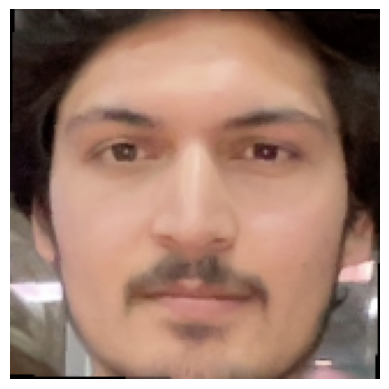

In [ ]:
plt.imshow(target_img[0][:,:,::-1])
plt.axis('off')
plt.show()

In [ ]:
target_embedding = model.predict(target_img)[0].tolist()

1/1 [==============================] - 0s 161ms/step


Reading from hdfs

In [ ]:
sdf = sparkSession.read.parquet('/tmp/hadoop-shubhamjha/dfs/name/video/embeddings.parquet')

In [ ]:
sdf.printSchema()

root
 |-- Time: double (nullable = true)
 |-- Embeddings: array (nullable = true)
 |    |-- element: double (containsNull = true)



In [ ]:
sdf = sdf.withColumn('target', F.array([F.lit(i) for i in target_embedding]))

In [ ]:
sdf.show(5)

+------------------+--------------------+--------------------+
|              Time|          Embeddings|              target|
+------------------+--------------------+--------------------+
| 17.79999999999997|[0.35185173153877...|[-0.0435072183609...|
|17.999999999999968|[0.12378301471471...|[-0.0435072183609...|
|18.199999999999967|[0.40668118000030...|[-0.0435072183609...|
|18.399999999999967|[0.59792697429656...|[-0.0435072183609...|
|18.599999999999966|[0.44500261545181...|[-0.0435072183609...|
+------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
sdf.show(5)

+------------------+--------------------+--------------------+
|              Time|          Embeddings|              target|
+------------------+--------------------+--------------------+
| 17.79999999999997|[0.35185173153877...|[-0.0435072183609...|
|17.999999999999968|[0.12378301471471...|[-0.0435072183609...|
|18.199999999999967|[0.40668118000030...|[-0.0435072183609...|
|18.399999999999967|[0.59792697429656...|[-0.0435072183609...|
|18.599999999999966|[0.44500261545181...|[-0.0435072183609...|
+------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
@F.udf("array<double>")
def subtract_dims(xs, ys):
    return [(x - y)*(x - y) for x, y in zip(xs, ys)]
sdf.show(5)

+------------------+--------------------+--------------------+
|              Time|          Embeddings|              target|
+------------------+--------------------+--------------------+
| 17.79999999999997|[0.35185173153877...|[-0.0435072183609...|
|17.999999999999968|[0.12378301471471...|[-0.0435072183609...|
|18.199999999999967|[0.40668118000030...|[-0.0435072183609...|
|18.399999999999967|[0.59792697429656...|[-0.0435072183609...|
|18.599999999999966|[0.44500261545181...|[-0.0435072183609...|
+------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
sdf = sdf.withColumn("dim_subtracts", subtract_dims("Embeddings", "target"))
sdf.show(5)

+------------------+--------------------+--------------------+--------------------+
|              Time|          Embeddings|              target|       dim_subtracts|
+------------------+--------------------+--------------------+--------------------+
| 17.79999999999997|[0.35185173153877...|[-0.0435072183609...|[0.15630869926577...|
|17.999999999999968|[0.12378301471471...|[-0.0435072183609...|[0.02798602208249...|
|18.199999999999967|[0.40668118000030...|[-0.0435072183609...|[0.20266959401902...|
|18.399999999999967|[0.59792697429656...|[-0.0435072183609...|[0.41143782351014...|
|18.599999999999966|[0.44500261545181...|[-0.0435072183609...|[0.23864185773172...|
+------------------+--------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
sdf = sdf.select('*')
sdf.show(5)

+------------------+--------------------+--------------------+--------------------+
|              Time|          Embeddings|              target|       dim_subtracts|
+------------------+--------------------+--------------------+--------------------+
| 17.79999999999997|[0.35185173153877...|[-0.0435072183609...|[0.15630869926577...|
|17.999999999999968|[0.12378301471471...|[-0.0435072183609...|[0.02798602208249...|
|18.199999999999967|[0.40668118000030...|[-0.0435072183609...|[0.20266959401902...|
|18.399999999999967|[0.59792697429656...|[-0.0435072183609...|[0.41143782351014...|
|18.599999999999966|[0.44500261545181...|[-0.0435072183609...|[0.23864185773172...|
+------------------+--------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
distance_column = []
for row in sdf.collect():  # Iterate over each row of the DataFrame
    distance = 0
    for element in row['dim_subtracts']:  # Iterate over each element in the `dim_subtracts` array
        distance += element
    distance_column.append(distance)

len(distance_column)


178

In [ ]:
distance_df = sparkSession.createDataFrame([(i,) for i in distance_column], ['distance'])
distance_df.show(5)

+-----------------+
|         distance|
+-----------------+
|45.54126001004899|
|41.13193598179157|
|50.28356921777957|
|50.81971670959255|
|80.18899370599806|
+-----------------+
only showing top 5 rows



In [ ]:
sdf = sdf.withColumn("id", F.monotonically_increasing_id())
distance_df = distance_df.withColumn("id", F.monotonically_increasing_id())

sdf.show(5)
distance_df.show(5)

+------------------+--------------------+--------------------+--------------------+---+
|              Time|          Embeddings|              target|       dim_subtracts| id|
+------------------+--------------------+--------------------+--------------------+---+
| 17.79999999999997|[0.35185173153877...|[-0.0435072183609...|[0.15630869926577...|  0|
|17.999999999999968|[0.12378301471471...|[-0.0435072183609...|[0.02798602208249...|  1|
|18.199999999999967|[0.40668118000030...|[-0.0435072183609...|[0.20266959401902...|  2|
|18.399999999999967|[0.59792697429656...|[-0.0435072183609...|[0.41143782351014...|  3|
|18.599999999999966|[0.44500261545181...|[-0.0435072183609...|[0.23864185773172...|  4|
+------------------+--------------------+--------------------+--------------------+---+
only showing top 5 rows

+-----------------+---+
|         distance| id|
+-----------------+---+
|45.54126001004899|  0|
|41.13193598179157|  1|
|50.28356921777957|  2|
|50.81971670959255|  3|
|80.18899370599

In [ ]:
sdf = sdf.join(distance_df, "id", "outer")
sdf.show(5)

+---+------------------+--------------------+--------------------+--------------------+-----------------+
| id|              Time|          Embeddings|              target|       dim_subtracts|         distance|
+---+------------------+--------------------+--------------------+--------------------+-----------------+
|  0| 17.79999999999997|[0.35185173153877...|[-0.0435072183609...|[0.15630869926577...|45.54126001004899|
|  1|17.999999999999968|[0.12378301471471...|[-0.0435072183609...|[0.02798602208249...|41.13193598179157|
|  2|18.199999999999967|[0.40668118000030...|[-0.0435072183609...|[0.20266959401902...|50.28356921777957|
|  3|18.399999999999967|[0.59792697429656...|[-0.0435072183609...|[0.41143782351014...|50.81971670959255|
|  4|18.599999999999966|[0.44500261545181...|[-0.0435072183609...|[0.23864185773172...|80.18899370599806|
+---+------------------+--------------------+--------------------+--------------------+-----------------+
only showing top 5 rows



In [ ]:
sdf = sdf.withColumn("distance", F.sqrt("distance"))
sdf.show(5)


+---+------------------+--------------------+--------------------+--------------------+------------------+
| id|              Time|          Embeddings|              target|       dim_subtracts|          distance|
+---+------------------+--------------------+--------------------+--------------------+------------------+
|  0| 17.79999999999997|[0.35185173153877...|[-0.0435072183609...|[0.15630869926577...| 6.748426484007141|
|  1|17.999999999999968|[0.12378301471471...|[-0.0435072183609...|[0.02798602208249...|6.4134184318342715|
|  2|18.199999999999967|[0.40668118000030...|[-0.0435072183609...|[0.20266959401902...| 7.091090834122743|
|  3|18.399999999999967|[0.59792697429656...|[-0.0435072183609...|[0.41143782351014...| 7.128794898830555|
|  4|18.599999999999966|[0.44500261545181...|[-0.0435072183609...|[0.23864185773172...| 8.954830746920797|
+---+------------------+--------------------+--------------------+--------------------+------------------+
only showing top 5 rows



In [ ]:
sdf.schema

StructType([StructField('id', LongType(), True), StructField('Time', DoubleType(), True), StructField('Embeddings', ArrayType(DoubleType(), True), True), StructField('target', ArrayType(DoubleType(), False), True), StructField('dim_subtracts', ArrayType(DoubleType(), True), True), StructField('distance', DoubleType(), True)])

In [ ]:
sdf = sdf.drop("embedding", "target", "dim_subtracts")

In [ ]:
sdf.show(5)

+---+------------------+--------------------+------------------+
| id|              Time|          Embeddings|          distance|
+---+------------------+--------------------+------------------+
|  0| 17.79999999999997|[0.35185173153877...| 6.748426484007141|
|  1|17.999999999999968|[0.12378301471471...|6.4134184318342715|
|  2|18.199999999999967|[0.40668118000030...| 7.091090834122743|
|  3|18.399999999999967|[0.59792697429656...| 7.128794898830555|
|  4|18.599999999999966|[0.44500261545181...| 8.954830746920797|
+---+------------------+--------------------+------------------+
only showing top 5 rows



SQL

In [ ]:
sdf.createOrReplaceTempView("video_db")

In [ ]:
query = sparkSession.sql("SELECT Time, distance from video_db where distance < 10 order by distance asc")

In [ ]:

results = query.collect()


In [ ]:

spotted = []
for result in results:
    #print(result["Time"], " /w ", round(result["distance"], 4)," distance")
    spotted.append(result["Time"])


In [ ]:
spotted = sorted(spotted)
print("Target spotted at :")
for instance in spotted:
  print(instance, "seconds")

Target spotted at :
0.0 seconds
0.2 seconds
0.4 seconds
0.6000000000000001 seconds
0.8 seconds
1.0 seconds
1.2 seconds
1.4 seconds
1.5999999999999999 seconds
1.7999999999999998 seconds
1.9999999999999998 seconds
2.1999999999999997 seconds
2.4 seconds
2.6 seconds
2.8000000000000003 seconds
3.0000000000000004 seconds
3.2000000000000006 seconds
3.600000000000001 seconds
13.599999999999984 seconds
13.799999999999983 seconds
14.199999999999982 seconds
14.39999999999998 seconds
14.59999999999998 seconds
14.79999999999998 seconds
14.999999999999979 seconds
15.199999999999978 seconds
15.399999999999977 seconds
15.599999999999977 seconds
15.799999999999976 seconds
15.999999999999975 seconds
16.199999999999974 seconds
16.399999999999974 seconds
16.599999999999973 seconds
16.799999999999972 seconds
16.99999999999997 seconds
17.39999999999997 seconds
17.79999999999997 seconds
17.999999999999968 seconds
18.199999999999967 seconds
18.399999999999967 seconds
18.599999999999966 seconds
18.999999999999